### 2.2 Data Analysis with Pandas
##### 1. Loading dataframes from different sources
##### 2. Operations on Columns
##### 3. Operations on DataFrames
##### 4. Visualization on DataFrames (Module 2.3 later)

In [2]:
# conventional way to import pandas
import pandas as pd

### 1. Reading Data from different sources and understanding meta data
    -formats: 
        tsv, csv, excel, json,etc 
    -sources
        web, local file system, sql server, etc
    -operations on reading
        columns naming, header, skipping rows, reading fix number of row, etc
    -functions
        pd.read_table, pd.read_csv, pd.read_excel, pd.read_csv, pd.read_sql

In [4]:
# read a dataset of Chipotle orders directly from a URL and store the results in a DataFrame
dfOrders = pd.read_table('http://bit.ly/chiporders')
#dfOrders

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [1]:
#now we look at some elements in data
dfOrders.head(1)

NameError: name 'dfOrders' is not defined

In [2]:
#nex read a dataset of Chipotle orders directly from a file stored on disk and store the results in a DataFrame
dfOrders = pd.read_table('data/chipotle.tsv') #tab separated values
#type(dfOrders)
dfOrders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [12]:
#reading from an excel file
dfML = pd.read_excel('./data/MachineLearningInExcel.xlsx')
dfML.head()
#pd.read_excel();

,height(cm),weight(kg),Unnamed: 2,Questions
0,125,32,NaN,What is relationship between Age and Weight
1,130,35,NaN,NaN
2,118,28,NaN,NaN
3,140,42,NaN,NaN
4,170,85,NaN,NaN


In [20]:
#EXCERCISE
#reading a specific sheet 'Daily Demand Forecast' from excel
dfML = pd.read_excel('./data/MachineLearningInExcel.xlsx', sheetname='Daily Demand Forecast')
dfML.head()

,Date,Elect. Demand,Unnamed: 2,Questions
0,2018-02-17,50,NaN,"What will be daily demand of prodct tomororw, ..."
1,2018-02-18,56,NaN,NaN
2,2018-02-19,60,NaN,NaN
3,2018-02-20,52,NaN,NaN
4,2018-02-21,53,NaN,NaN


In [39]:
#reading a file that has non-default separator
dfUsers = pd.read_table('data/movieusers.tsv') # seprator '|' is not defined
dfUsers.head()

,1|24|M|technician|85711
0,2|53|F|other|94043
1,3|23|M|writer|32067
2,4|24|M|technician|43537
3,5|33|F|other|15213
4,6|42|M|executive|98101


In [36]:
#Hmmm, so we should find some arguments to overcome that
dfUsers = pd.read_table('data/movieusers.tsv',sep='|')
dfUsers.head()
#ANY ISSUE?

,1,24,M,technician,85711
0,2,53,F,other,94043
1,3,23,M,writer,32067
2,4,24,M,technician,43537
3,5,33,F,other,15213
4,6,42,M,executive,98101


In [17]:
dfUsers = pd.read_table('data/movieusers.tsv',sep='|', header=None) # default numbers are assigned to each column
dfUsers.head()

,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [22]:
# defining user defined Column names
lstCols = ['id','age','gender','occupation','code']
dfUsers = pd.read_table('data/movieusers.tsv',sep='|', header=None,names=lstCols)
dfUsers.head()

,id,age,gender,occupation,code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [23]:
# Please read skiprow and skipfooter parameter of read_table
#TRY HERE
dfUsers = pd.read_table('data/movieusers.tsv',sep='|', header=None,names=lstCols,skiprows=5,nrows=5)
dfUsers

,id,age,gender,occupation,code
0,6,42,M,executive,98101
1,7,57,M,administrator,91344
2,8,36,M,administrator,5201
3,9,29,M,student,1002
4,10,53,M,lawyer,90703


In [29]:
#reading specific columns form a file
dfUFO = pd.read_csv('data/ufo.csv', usecols=['City','State'])
#dfUFO = pd.read_csv('data/ufo.csv', usecols=[x for x in dfUFO.columns if x.startswith('C')])
#### OR ####
#ufo = pd.read_csv('data/ufo.csv', usecols=[0,3])
dfUFO.head()


,City,State
0,Ithaca,NY
1,Belton,SC
2,Willingboro,NJ
3,Holyoke,CO
4,Abilene,KS


In [28]:
# to read only top rows
dfUFO = pd.read_csv('data/ufo.csv', nrows=4)
dfUFO.head()
#type(dfUFO)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Belton,RED,SPHERE,SC,6/30/1939 20:00
2,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
3,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


Two important objects in Pandas 
#### 1) Data Frame (consist of rows and cols) 
#### 2) Panda Series (cols)

In [14]:
#type(dfUFO)
#type(dfUFO.City)#a column or a series 
#type(dfUFO["City"]) # a column or a series
#second notation is especially useful when there is SPACE in column names, also best practice for readibility
dfUFO['Colors Reported'];

#### Extracting meta data

In [15]:
# shows statistics of numeric colums
dfUFO.describe() # example of method

,City,Colors Reported,Shape Reported,State,Time
count,18220,2883,15601,18245,18245
unique,6476,27,27,52,16145
top,Seattle,RED,LIGHT,CA,11/16/1999 19:00
freq,187,781,2803,2529,27


In [16]:
#len(dfUFO)
%timeit len(dfUFO.count())

7.51 ms ± 222 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
#ufo.dtypes; # example of attribute
dfUFO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18245 entries, 0 to 18244
Data columns (total 5 columns):
City               18220 non-null object
Colors Reported    2883 non-null object
Shape Reported     15601 non-null object
State              18245 non-null object
Time               18245 non-null object
dtypes: object(5)
memory usage: 712.8+ KB


In [18]:
dfUFO.shape # example of attribute

(18245, 5)

In [19]:

dfUFO.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18245 entries, 0 to 18244
Data columns (total 5 columns):
City               18220 non-null object
Colors Reported    2883 non-null object
Shape Reported     15601 non-null object
State              18245 non-null object
Time               18245 non-null object
dtypes: object(5)
memory usage: 712.8+ KB


In [20]:
dfUFO.index

RangeIndex(start=0, stop=18245, step=1)

### 2. Operations on columns
- creating new columns from existing one
- renaming
- dropping


In [21]:
#getting the columns
dfUFO.columns
#list(dfUFO.columns)

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [22]:
dfUFO.head();

In [23]:
#creating a new column as sum/concatation of two columns
dfUFO['Location'] = dfUFO.City + ' , ' + dfUFO.State;
# to create a new series in DF don't use do notation, For assignment it is necessary that we should use barcket notation
dfUFO.head();

In [24]:
#renaming columns
dfUFO.rename(columns={'Colors Reported': 'Colors_Reported', 'Shape Reported':'Shape_Reported'}) 
dfUFO.columns
#WHAT?

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time',
       'Location'],
      dtype='object')

In [25]:
#import sqlalchemy 
#pd.read_sql()

### Excercise:
    Really renaming the columns

In [26]:
#try it
#pd.DataFrame.rename()
dfUFO.rename(columns={'Colors Reported': 'Colors_Reported', 'Shape Reported':'Shape_Reported'},inplace=True) 
dfUFO.columns

Index(['City', 'Colors_Reported', 'Shape_Reported', 'State', 'Time',
       'Location'],
      dtype='object')

In [27]:
mycol =[x.lower() for x in dfUFO.columns]

In [28]:
# Another Method of renaming the columns
mycol = ['city','color reported', 'shape reported','state','time', 'location']
dfUFO.columns = mycol

In [29]:
# Renaming the columns names while reading
#import pandas as pd
mycol = ['city','color reported', 'shape reported','state','time', 'location']
dfUFO = pd.read_csv('data/ufo.csv',names=mycol)
dfUFO.head();

In [30]:
# Assume you have thousands of col with spaces in between
dfUFO.columns = dfUFO.columns.str.replace(' ','_')
#dfUFO.columns = dfUFO.columns.strip.replace(' ','_')

In [31]:
# use axis = 1 to drop column
dfUFO.drop('shape_reported', axis=1); #axis 0 means rows
#WHAT?
dfUFO.columns
#pd.DataFrame.drop()

Index(['city', 'color_reported', 'shape_reported', 'state', 'time',
       'location'],
      dtype='object')

In [32]:
#Ex. Really dropping the column 'location'
#Try it
#dfUFO.drop('location', axis=1,inplace=True); 
dfUFO.columns

Index(['city', 'color_reported', 'shape_reported', 'state', 'time',
       'location'],
      dtype='object')

In [117]:
# to drop multiple columns, 'city' and 'time'
#Try it
#dfUFO.drop(['city', 'time'], axis=1,inplace=True);
dfUFO.columns

Index(['color_reported', 'shape_reported', 'state'], dtype='object')

In [37]:
#how about dropping rows? 0 and 1
#Try it
dfUFO.drop(1,axis=0,inplace=True);
dfUFO.head()

,city,color_reported,shape_reported,state,time,location
2,Belton,RED,SPHERE,SC,6/30/1939 20:00,NaN
3,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,NaN
4,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,NaN
5,Abilene,NaN,DISK,KS,6/1/1931 13:00,NaN
6,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,NaN


### Excerise:
    Please read the data from imdb_1000 and calculate sum of star_rating and max duration of movie ???

In [123]:
import pandas as pd
mydf=pd.read_csv('data\imdb_1000.csv')
#mydf.head()

### 3. Some DataFrame Operations
- subselecting dataframe columns
- Sorting data frame by one or more columns
- Filtering data
- Iterating over dataframe
- grouping / groupby
- merging and concatinating dataframes
- handling missing values


In [39]:
import pandas as pd
dfMovies = pd.read_csv('data/imdb_1000.csv')
dfMovies.head();
dfMovies.star_rating.sum()
#sum(dfMovies.star_rating)
#import numpy as np
#np.sum(dfMovies.star_rating)

7724.100000000025

In [40]:
dfMovies.count()

star_rating       979
title             979
content_rating    976
genre             979
duration          979
actors_list       979
dtype: int64

In [41]:
#3.0 subselecting dataframe over some columns 
dfM2=dfMovies[['title', 'genre']]; #dataframe[list of columns] dataframe is by default by Reference
dfM1=dfMovies[['title', 'genre']].copy();


#### 3.1 Sorting

In [42]:
#sorting above dataframe by movie titles in ascending and descending order
dfMovies['title'].sort_values();# it returns panda series and default is assending order
#in both orders

In [43]:
dfMovies['star_rating'].sort_values(ascending=False).head()

0    9.3
1    9.2
2    9.1
3    9.0
6    8.9
Name: star_rating, dtype: float64

In [44]:
# sorting by mulitple columns in different orders
#Try It
dfMovies.sort_values(['star_rating','title'], ascending=[False, True]);

#### 3.2 Filtering/Slicing

In [45]:
#### Excercise: select movies with duration above 200 minutes
len(dfMovies)

979

In [54]:
# conventional appraoch-first create filter, then get data
bl = []
for d in dfMovies.duration:
    if d>=200:
        bl.append(True)
    else:
        bl.append(False)
len(bl)
#Ex
#did you notice something interesting construct above
bl;

In [51]:
dfMovies[bl];#accesssing the list on True points

[False, False, True, False, False]


In [55]:
# simple version - Slicing inside dataframe
dfSub=dfMovies[dfMovies.duration >= 200].copy();

##### How to get values of certain column after filtering

In [56]:
#dfMovies[dfMovies.duration>=200].duration
#dfMmovies[dfMovies.duration>=200]['duration']
#dfMovies.loc[dfMovies.duration>=200, 'duration'] # recommended approach

##### Apply Multiple filters

In [57]:
#movies[movies.duration>=200 & movies.genre=='Crime'] # this will not work
dfMovies[(dfMovies.duration>=200) & (dfMovies.genre=='Crime')] 

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."


##### Movies with genere in 'Drama','Crime', or 'Action'

In [58]:
# if we use multiple condition on single attribute 
dfMovies[dfMovies.genre.isin(['Drama','Crime','Action'])];

#### 3.3 iterating over series, dataframe rows

In [171]:
# how to iterate DF and series
dfMovies = pd.read_csv('data/imdb_1000.csv', nrows=5);
#movies.head()

# for series
for d in dfMovies.duration:
    pass
    #print (d);

# for DF
for index, r in dfMovies.iterrows(): # iterrows returns row elements as dictionaries
    print(r['title'])
    ##break
    #print (index, r.star_rating, r.title);

The Shawshank Redemption
The Godfather
The Godfather: Part II
The Dark Knight
Pulp Fiction


In [176]:
for i in range(len(dfMovies)):
    print(i,dfMovies.iloc[i])#['title']);
    break;

0 star_rating                                                     9.3
title                                      The Shawshank Redemption
content_rating                                                    R
genre                                                         Crime
duration                                                        142
actors_list       [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...
Name: 0, dtype: object


#### 3.4 Group By

In [190]:
#Syntax of Groupby --> df.Groupby(by=Index_Columns)[AggregatorColumns].AggegrateOperation
import numpy as np
dfMovies = pd.read_csv('data/imdb_1000.csv')
#dfMovies.groupby(by='genre', as_index=False,sort=False).count()#
#dfMovies.groupby('genre')['star_rating'].count()#
#dfMovies.groupby('genre')['star_rating', 'duration'].count()#one aggregation type on multiple colums 
#dfMovies.groupby('genre')['star_rating', 'duration'].agg(len) #another way of one multiple aggregation
#dfMovies.groupby('genre')['star_rating', 'duration'].agg([len, np.max]) #applying two aggregation on two columns
dfMovies.groupby('genre')['star_rating', 'duration'].agg({'num': len, 'max_length':np.max}); #applying two aggregation on two columns
#dfMovies.groupby('genre', as_index=False, sort=False)['star_rating', 'duration'].agg({'num': len, 'max_length':np.max}).reset_index() #applying two aggregation on two columns




C:\Users\Lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [192]:
#%matplotlib inline
#dfMovies.groupby('genre')['star_rating'].plot()#


#### Excercise: Which kind of movies are most liked by audience (star_rating)

In [181]:
dfMovies.groupby(by=['genre'])['star_rating'].mean();

In [182]:
%matplotlib inline

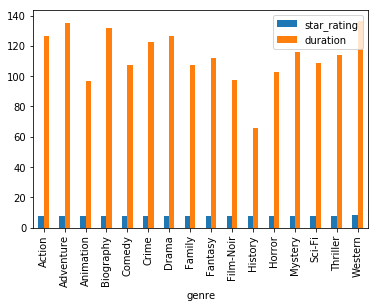

In [183]:
dfMovies.groupby('genre').mean().plot(kind='bar');

#### Does duration impact on star_rating?

In [194]:
dfMovies.groupby(by=['star_rating'], as_index=False, sort=False)['duration'].mean().sort_values('duration', ascending=False);

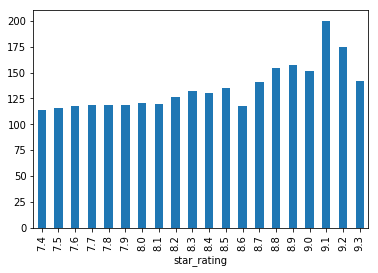

In [196]:
dfMovies.groupby('star_rating')['duration'].mean().plot(kind='bar');

#### could life be a bit better by not doing above?

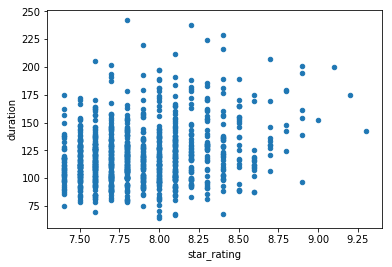

In [195]:
dfMovies.plot(x='star_rating', y ='duration', kind='scatter')

#### 3.5 DataFrame merging and concatinations

In [197]:
# See in solution
#df1, df2
#df3 = pd.merge(df1,df2,how='left/inner/outer/right',left_on='col1',right_on,suffixes=('_'))

#### 3.5 Handeling missing values
- finding null/notnull values
- dropping null values
- missing null values

In [256]:
import pandas as pd
dfUFO = pd.read_csv('data/ufo.csv')
dfUFO.tail();

In [214]:
#getting for each columns mask of null values
dfUFO.isnull().tail();

In [215]:
#the not null values
dfUFO.notnull().tail();

In [216]:
dfUFO.isnull().sum(); # returns no. of sums of missing values

In [217]:
#slicing a dataframe for null/notnull values
dfUFO[dfUFO.City.isnull()];
dfUFO[dfUFO.City.notnull()];

In [145]:
# drops all rows that contains ANY of five columns have missing value
dfUFO.dropna(how='any').shape 

(2487, 5)

In [207]:
# drops all rows that contains ALL of five columns have missing value
dfUFO.dropna(how='all').shape 

(18245, 5)

In [208]:
# drops all rows that contains ANY of two columns have missing values
dfUFO.dropna(subset=['City', 'Shape Reported'], how='any').shape 

(15580, 5)

In [220]:
# replace NaN with No
#dfUFO['Shape Reported'].fillna(value='No', inplace=True) 
#dfUFO['Shape Reported'].fillna(value='No', inplace=True, method=None) # replace NaN with No,


In [224]:
dfUFO.drop_duplicates(keep='first');

##### 3.8More operations
- loc and iloc
- copy
- lambda notation
- map/reduce on series/dataframe
- display options

In [225]:
# finally, replace the 'NOT RATED' values with 'NaN' (imported from NumPy)
import numpy as np
dfMovies[dfMovies.content_rating=='NOT RATED'].content_rating = np.nan

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Problem: That statement involves two operations, a __getitem__ and a __setitem__. pandas can't guarantee whether the __getitem__ operation returns a view or a copy of the data.
If __getitem__ returns a view of the data, __setitem__ will affect the 'movies' DataFrame.
But if __getitem__ returns a copy of the data, __setitem__ will not affect the 'movies' DataFrame.

In [227]:
# replace the 'NOT RATED' values with 'NaN' (does not cause a SettingWithCopyWarning)
dfMovies.loc[dfMovies.content_rating=='NOT RATED', 'content_rating'] = np.nan

In [228]:
# explicitly create a copy of 'movies'
dfTopMovies = dfMovies.loc[movies.star_rating >= 9, :].copy()

In [235]:
# pandas now knows that you are updating a copy instead of a view (does not cause a SettingWithCopyWarning)
dfTopMovies.loc[0, 'duration'] = 150

In [236]:
# 'top_movies' DataFrame has been updated
dfTopMovies;

display options

In [237]:
dfMovies; # show only sixty values

In [232]:
# check the current setting for the 'max_rows' option
pd.get_option('display.max_rows')

60

In [233]:
# overwrite the current setting so that all rows will be displayed
pd.set_option('display.max_rows', None)

In [238]:
dfMovies; # now show all rows

In [ ]:
# reset the 'max_rows' option to its default
pd.reset_option('display.max_rows')

In [239]:
dfMovies;

In [ ]:
# the 'max_columns' option is similar to 'max_rows'
pd.get_option('display.max_columns')

###### MAP / REDUCE IN PANDAS (PYTHON)

In [59]:
#create a new column in dfUFO that contains second name of the city

#dfUFO['City_LastName'] = dfUFO.City.apply(lambda x: str(x[str(x).find(' '):]) if ' ' in str(x) else '')
dfUFO['City_LastName'] = dfUFO.City.apply(lambda x: myfunction(x))
def myfunction(x):
    return str(x[str(x).find(' '):]) if ' ' in str(x) else ''

AttributeError: 'DataFrame' object has no attribute 'City'

In [257]:
dfUFO.tail();

In [253]:
#some more examples

#### x Explore panda Series (HW)

In [174]:
dfMovies = pd.read_csv('data/imdb_1000.csv')
dfMovies.head()
dfMovies.dtypes
dfMovies.describe()
dfMovies.genre.describe()
dfMovies.genre.value_counts()
dfMovies.genre.value_counts(normalize=True) # return %ages
type(dfMovies.genre.value_counts(normalize=True))
dfMovies.genre.value_counts(normalize=True).head()
dfMovies.genre.unique()#a handy operation
dfMovies.genre.nunique()

16